# Introduction

Cats and dogs

Examining the photos: 
- some are not clear, I cannot identify,
- cats and dogs mixed, different breeds
- some are illustrations
- manually select the photo

- limited by the storage in Codespaces

References:


# Setup
Setup the libraries and data path

In [1]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

import os
from pathlib import Path
from glob import glob
import PIL

# Define global variables
# The classnames and data directories
cat_class = 'cat'
dog_class = 'dog'
class_names = [cat_class, dog_class]

train_dir = 'train'
test_dir = 'test'
dir_list = [train_dir, test_dir]

data_dir = "/workspaces/codespaces-jupyter/data/cat_dog"

# Define random seed value
# Make the tf as deterministic as possible
random_seed = 10
tf.keras.utils.set_random_seed(random_seed)

2023-10-29 13:43:14.152305: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-29 13:43:16.494732: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-29 13:43:16.494779: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-29 13:43:16.496811: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-29 13:43:17.427837: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-29 13:43:17.428890: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

# Explore the dataset

In [2]:
def check_data_files():
    # List the number of samples from each of the
    # train and test test.

    # Number of samples in each of the train, validation and test sets
    for d in dir_list:
        for cn in class_names:
            sample_dir = os.path.join(data_dir, d, cn)
            print(sample_dir)
            file_list = list(Path(sample_dir).glob("*.jpg"))
            print(f"{sample_dir}: Number of files: {len(file_list)}")

    return 0

def show_images():
    # Choose which image class to show, and the number of images

    # Show information about the images
    nrows = 2
    ncols = 5

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 4), layout='constrained')
    fig.subplots_adjust(wspace=0.1, hspace=0.01)
    
    # Get the first image in the train directory
    for i, cn in enumerate(class_names):
        sample_dir = os.path.join(data_dir, train_dir, cn)
        print(sample_dir)
        file_list = list(Path(sample_dir).glob("*.jpg"))
        for j in range(ncols):
            im = PIL.Image.open(file_list[j])
            print(f"{im.format}, {im.size}, {im.mode}")
            axes[i][j].imshow(im)
            axes[i][j].set_title(cn)

    plt.show()
    plt.clf()
    return 0

In [3]:
check_data_files()

/workspaces/codespaces-jupyter/data/cat_dog/train/cat
/workspaces/codespaces-jupyter/data/cat_dog/train/cat: Number of files: 120
/workspaces/codespaces-jupyter/data/cat_dog/train/dog
/workspaces/codespaces-jupyter/data/cat_dog/train/dog: Number of files: 120
/workspaces/codespaces-jupyter/data/cat_dog/test/cat
/workspaces/codespaces-jupyter/data/cat_dog/test/cat: Number of files: 50
/workspaces/codespaces-jupyter/data/cat_dog/test/dog
/workspaces/codespaces-jupyter/data/cat_dog/test/dog: Number of files: 50


0

/workspaces/codespaces-jupyter/data/cat_dog/train/cat


/tmp/ipykernel_3632/2040896196.py:23: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(wspace=0.1, hspace=0.01)


JPEG, (1200, 798), RGB
JPEG, (500, 333), RGB
JPEG, (500, 500), RGB
JPEG, (225, 225), RGB
JPEG, (500, 333), RGB
/workspaces/codespaces-jupyter/data/cat_dog/train/dog
JPEG, (500, 329), RGB
JPEG, (500, 333), RGB
JPEG, (500, 338), RGB
JPEG, (500, 375), RGB
JPEG, (500, 413), RGB


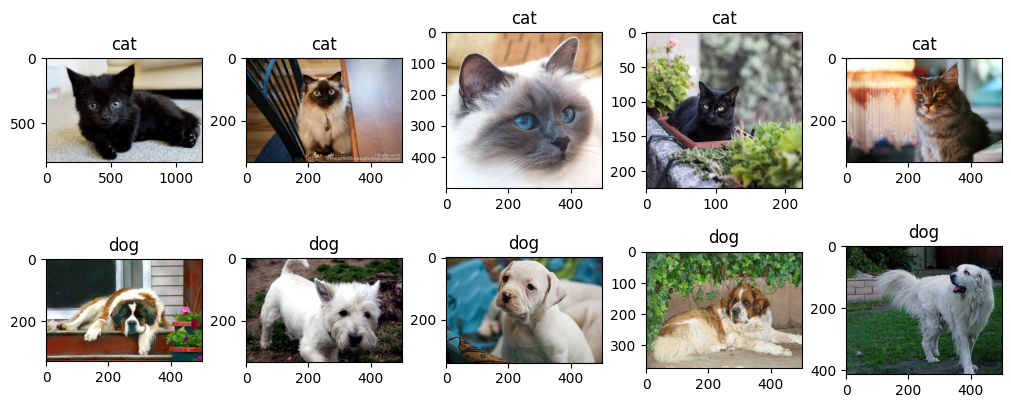

0

<Figure size 640x480 with 0 Axes>

In [4]:
# Images from the plain, raw data
show_images()

Original images loaded from file are of different height and width.

# Load data into tf dataset

## Data preprocessing

- Read the picture files.
- Decode the JPEG content to RGB grids of pixels.
- Convert these into floating-point tensors.
- Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

In [5]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.data import Dataset

In [6]:
img_height = 256
img_width = 256
batch_size = 16

def load_image_dataset(directory, subset):
    # If subset is "Test", then validation_split is 0.
    # Manually create a "test" subset that returns all
    # the samples for test set.
    validation_split = None if subset is None else 0.2
    
    ds =  image_dataset_from_directory(
        directory=directory, 
        labels="inferred",
        label_mode="binary",
        validation_split=validation_split,
        color_mode="rgb",
        subset=subset,
        seed=random_seed,
        image_size=(img_height, img_width),
        batch_size=batch_size,
        interpolation="bilinear"
    )
    print(f"Loading images from {directory}")
    print(f"Subset: {subset}")
    print(ds.class_names)
    print() # Print a newline for the next call to make reading easier
    return ds

In [7]:
directory = os.path.join(data_dir, train_dir)

subset = "training"
train_ds = load_image_dataset(directory, subset)

subset = "validation"
val_ds = load_image_dataset(directory, subset)

Found 240 files belonging to 2 classes.
Using 192 files for training.
Loading images from /workspaces/codespaces-jupyter/data/cat_dog/train
Subset: training
['cat', 'dog']

Found 240 files belonging to 2 classes.
Using 48 files for validation.
Loading images from /workspaces/codespaces-jupyter/data/cat_dog/train
Subset: validation
['cat', 'dog']



In [8]:
for i, (image_batch, labels_batch) in enumerate(train_ds):
  print(f"First batch of {image_batch.shape[0]} is a 3D tensor of shape {image_batch.shape[1:]}.")
  print(f"Labels is of shape {labels_batch.shape}")
  # Only print one iteration
  if i == 0: break

First batch of 16 is a 3D tensor of shape (256, 256, 3).
Labels is of shape (16, 1)


In [9]:
print(f"Batch size: {batch_size}")
print(f"Number of batches: {len(train_ds)}")

Batch size: 16
Number of batches: 12


Length of one batch: 16


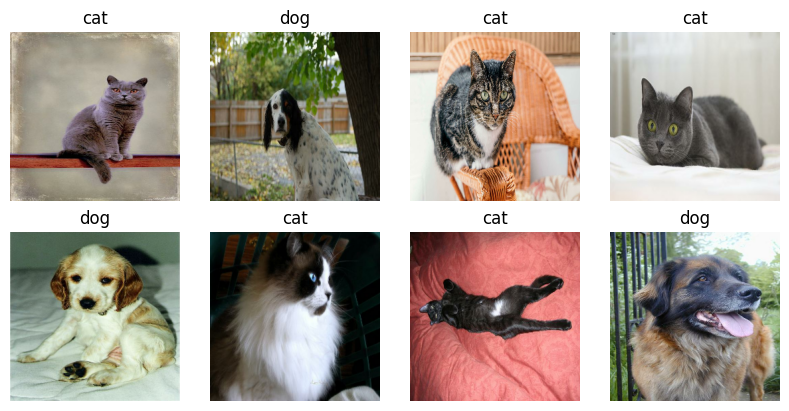

In [10]:
# Plot the images that is loaded into the tf dataset

nrows = 2
ncols = 4
fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
  figsize=(8, 4), layout="constrained")

# Dataset.take(count=1) will take one batch of data
for images, labels in train_ds.take(1):
  im_len = len(images)
  print(f"Length of one batch: {im_len}")
  im_num = 0
  for i in range(nrows):
    for j in range(ncols):
      label = labels[im_num].numpy().astype("uint8")
      label_name = "cat" if label == 0 else "dog"
      #print(f"Label: {label}, {label_name}")
      axes[i, j].imshow(images[im_num].numpy().astype("uint8"))
      axes[i, j].set_title(label_name)
      axes[i, j].axis("off")
      im_num = im_num + 1

The images loaded into the dataset are of the same size as compared to the original raw data loaded from files.

# Configure dataset for optimal performance

In order to avoid I/O from becoming blocked when yielding data, buffered prefectching is used. The following steps are used:
- `Dataset.cache`
    - This keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training the model.
- `Dataset.prefect`
    - overlaps data preprocessing and model execution while training
- Shuffling
    - Each fetch of a batch of data will be shuffled. This is to ensure that the data are well mixed up to improve training accuracy.

In [11]:
AUTOTUNE = tf.data.AUTOTUNE

# Number of samples is 240, so the shuffle is set to a low number.
train_ds = train_ds.cache().shuffle(60).prefetch(buffer_size=AUTOTUNE)

val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Normalized the RGB values

Neural network needs to work with small values [0, 1]. However, RGB values are in the range of [0, 255]. Therefore, the values need to be normalized before they can be used in model training.

The layers.Rescaling(1.0/255) can be used as the first layer in a Sequential model.

# Building the model

First layers:
    - Specify input sizes,
    - Rescaling and any other preprocessing if necessary.


Final layers:
    - The output in binary classification.

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [54]:
# RGB
num_channel = 3

def my_initial_model(num_layers):
    # Create a sequential model
    model = Sequential()
    # Define the input shape
    model.add(layers.Input(shape=(img_width, img_height, num_channel)))
    model.add(layers.Rescaling(1./255))
    # Inner layer made up of convolutional network and max pooling
    # Inner layer 1
    model.add(layers.Conv2D(32, (3, 3), activation="relu", kernel_regularizer="l2", bias_regularizer="l2"))
    model.add(layers.MaxPooling2D((2, 2)))
    if num_layers == 2 or num_layers == 3:
        # Inner layer 2
        model.add(layers.Conv2D(64, (3, 3), activation="relu", kernel_regularizer="l2", bias_regularizer="l2"))
        model.add(layers.MaxPooling2D((2, 2)))
    # Inner layer 3
    if num_layers == 3:
        model.add(layers.Conv2D(128, (3, 3), activation="relu"))
        model.add(layers.MaxPooling2D((2, 2)))
    # Preparing for the final output
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation="relu", kernel_regularizer="l2", bias_regularizer="l2"))
    # Output layer
    num_classes = 1
    model.add(layers.Dense(num_classes, activation="sigmoid",  kernel_regularizer="l2", bias_regularizer="l2"))
    model.summary()
    return model

In [14]:
initial_model_1 = my_initial_model(num_layers=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 246016)            0

# Compile the model

In [15]:
from tensorflow.keras import optimizers

def my_compile_model(model):
    model.compile(
        loss='binary_crossentropy',
        optimizer=optimizers.RMSprop(learning_rate=1e-4),
        metrics=['acc']
    )

# Compile my model
my_compile_model(initial_model_1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 246016)            0

In [16]:
from tensorflow.keras import callbacks

num_epochs = 10

my_logdir = "/workspaces/codespaces-jupyter/my_logdir/cat_dog/"
best_model_path = my_logdir + "model_best.keras"
epoch_model_path = my_logdir + "model_{epoch:02d}.keras"

def my_fit_model(model):
    # callbacks.EarlyStopping(patience=2),
    my_callbacks = [
        callbacks.ModelCheckpoint(filepath=epoch_model_path),
        callbacks.TensorBoard(log_dir=my_logdir),
    ]
    
    history = model.fit(
      train_ds,
      validation_data=val_ds,
      epochs=num_epochs,
      callbacks=my_callbacks
    )
    # Print a summary of training result
    print("\nSummary of training")
    for k, v in history.history.items():
        print(f"{k}: {v}, \n    average: {np.mean(v)}+-{np.std(v)}")
    
    return history

In [17]:
# Fit the model
history = my_fit_model(initial_model_1)

Epoch 1/10
12/12 [==============================] - 11s 822ms/step - loss: 1.0413 - acc: 0.4948 - val_loss: 0.6921 - val_acc: 0.4792
Epoch 2/10
12/12 [==============================] - 9s 793ms/step - loss: 0.7144 - acc: 0.5521 - val_loss: 0.7623 - val_acc: 0.5208
Epoch 3/10
12/12 [==============================] - 10s 815ms/step - loss: 0.6904 - acc: 0.6198 - val_loss: 0.6855 - val_acc: 0.5208
Epoch 4/10
12/12 [==============================] - 11s 905ms/step - loss: 0.6827 - acc: 0.5990 - val_loss: 0.6744 - val_acc: 0.5625
Epoch 5/10
12/12 [==============================] - 11s 878ms/step - loss: 0.6576 - acc: 0.6094 - val_loss: 0.6681 - val_acc: 0.5833
Epoch 6/10
12/12 [==============================] - 10s 855ms/step - loss: 0.5933 - acc: 0.7344 - val_loss: 0.7246 - val_acc: 0.5000
Epoch 7/10
12/12 [==============================] - 10s 823ms/step - loss: 0.6035 - acc: 0.7240 - val_loss: 0.7024 - val_acc: 0.5000
Epoch 8/10
12/12 [==============================] - 10s 816ms/step - l

# Training results

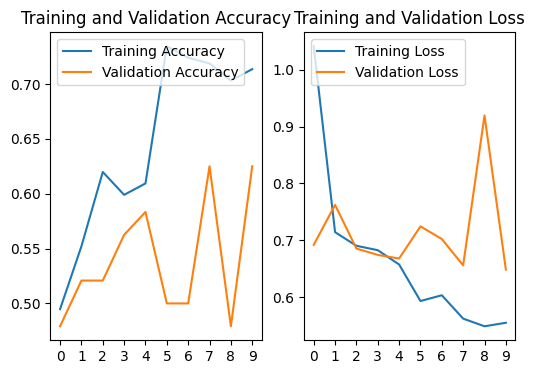

<Figure size 640x480 with 0 Axes>

In [18]:
def my_training_results(history, title=None):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(num_epochs)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 4))
    axes[0].plot(epochs_range, acc, label='Training Accuracy')
    axes[0].plot(epochs_range, val_acc, label='Validation Accuracy')
    axes[0].legend(loc='upper left')
    axes[0].set(xticks=epochs_range)
    axes[0].set_title('Training and Validation Accuracy')
    
    axes[1].plot(epochs_range, loss, label='Training Loss')
    axes[1].plot(epochs_range, val_loss, label='Validation Loss')
    axes[1].legend(loc='upper left')
    axes[1].set(xticks=epochs_range)
    axes[1].set_title('Training and Validation Loss')
    
    fig.suptitle(title)
    plt.show()
    plt.clf()

# Plot the results
my_training_results(history, "Initial model with one layer\n(Conv2D and MaxPooling2D)")

# Two layers of Conv2D and MaxPooling2D

less is more

In [ ]:
initial_model_2 = my_initial_model(num_layers=2)
my_compile_model(initial_model_2)
history = my_fit_model(initial_model_2)
my_training_results(history, "Initial model with two layer\n(Conv2D and MaxPooling2D)")

# Improve the model with data augmentation

## Data Augmentation

From the above plot, the training accuracy and losses fluctuates a lot. Also, there is not indication that the trend will converge.


Overfitting generally occurs when there are a small number of training examples. Data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

References: https://keras.io/guides/preprocessing_layers/



In [19]:
data_augmentation = Sequential([
    layers.RandomFlip(
        "horizontal", 
        input_shape=(img_height, img_width, num_channel),
        seed=random_seed
    ),
    layers.RandomTranslation(
        height_factor=0.1,
        width_factor=0.1,
        seed=random_seed),
    layers.RandomRotation(0.1, seed=random_seed),
    layers.RandomZoom(0.1, seed=random_seed)
])

In [20]:
data_augmentation.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 256, 256, 3)       0         
                                                                 
 random_translation (Random  (None, 256, 256, 3)       0         
 Translation)                                                    
                                                                 
 random_rotation (RandomRot  (None, 256, 256, 3)       0         
 ation)                                                          
                                                                 
 random_zoom (RandomZoom)    (None, 256, 256, 3)       0         
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


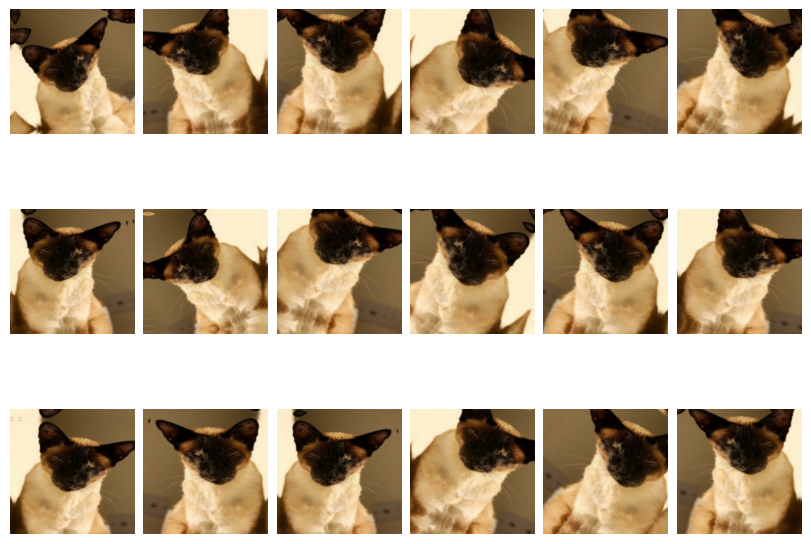

In [21]:
# Visualize a few augmented examples by applying data augmentation 
# to the same image several times.

plt.figure(figsize=(8, 6), layout="constrained")

for images, _ in train_ds.take(1):
  for i in range(18):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 6, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## Adding dropout

When you apply dropout to a layer, it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

## Improved model

The model will be improved by adding data augmentation just after the input layer, and adding dropout before the final flattening of layers.

In [55]:

def my_model_sequence(dense_units, activation_1, activation_2, dropout_rate, num_layers):
    # The parameters above are used by keras_tuner hyperparameters
    # activation_1 and activation_2 refers to the activation of the
    # Conv2D layers.
    # dropout_rate is the rate for Dropout layers.
    
    # Create a sequential model
    model = Sequential()
    # Define the input shape and rescaling
    model.add(layers.Input(shape=(img_width, img_height, num_channel)))
    # Adding in data augmentation
    model.add(layers.RandomFlip(
        "horizontal", 
        input_shape=(img_height, img_width, num_channel),
        seed=random_seed)
    )
    model.add(layers.RandomTranslation(
        height_factor=0.1,
        width_factor=0.1,
        seed=random_seed)
    )
    model.add(layers.RandomRotation(0.1, seed=random_seed))
    model.add(layers.RandomZoom(0.1, seed=random_seed))
    # Rescaling
    model.add(layers.Rescaling(1./255))
    # Inner layer made up of convolutional network and max pooling
    # Inner layer 1
    model.add(layers.Conv2D(32, (3, 3), activation=activation_1, kernel_regularizer="l2", bias_regularizer="l2"))
    model.add(layers.MaxPooling2D((2, 2)))
    if num_layers == 2:
        # Inner layer 2
        model.add(layers.Conv2D(64, (3, 3), activation=activation_2, kernel_regularizer="l2", bias_regularizer="l2"))
        model.add(layers.MaxPooling2D((2, 2)))
    # Inner layer 3
    #model.add(layers.Conv2D(128, (3, 3), activation=activation_1))
    #model.add(layers.MaxPooling2D((2, 2)))
    # Adding dropout
    model.add(layers.Dropout(rate=dropout_rate, seed=random_seed)),
    # Preparing for the final output
    model.add(layers.Flatten())
    model.add(layers.Dense(dense_units, activation=activation_1), kernel_regularizer="l2", bias_regularizer="l2")
    # Output layer
    num_classes = 1
    model.add(layers.Dense(num_classes, activation="sigmoid", kernel_regularizer="l2", bias_regularizer="l2"))
    # Return the model
    return model

In [23]:
# Compile the new model
new_model = my_model_sequence(
    dense_units=128,
    activation_1="relu",
    activation_2="relu",
    dropout_rate=0.1,
    num_layers=1
)
my_compile_model(new_model)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 random_translation_1 (Rand  (None, 256, 256, 3)       0         
 omTranslation)                                                  
                                                                 
 random_rotation_1 (RandomR  (None, 256, 256, 3)       0         
 otation)                                                        
                                                                 
 random_zoom_1 (RandomZoom)  (None, 256, 256, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 254, 254, 32)     

In [24]:
# Fit the new model
history = my_fit_model(new_model)

Epoch 1/10
12/12 [==============================] - 10s 739ms/step - loss: 1.6532 - acc: 0.4740 - val_loss: 0.6891 - val_acc: 0.5833
Epoch 2/10
12/12 [==============================] - 9s 742ms/step - loss: 0.7687 - acc: 0.5729 - val_loss: 0.9930 - val_acc: 0.5208
Epoch 3/10
12/12 [==============================] - 8s 710ms/step - loss: 0.8006 - acc: 0.5260 - val_loss: 0.7359 - val_acc: 0.5208
Epoch 4/10
12/12 [==============================] - 8s 700ms/step - loss: 0.7146 - acc: 0.5573 - val_loss: 0.7023 - val_acc: 0.5208
Epoch 5/10
12/12 [==============================] - 8s 716ms/step - loss: 0.6906 - acc: 0.5885 - val_loss: 0.6593 - val_acc: 0.6250
Epoch 6/10
12/12 [==============================] - 8s 706ms/step - loss: 0.6795 - acc: 0.5833 - val_loss: 0.7317 - val_acc: 0.5000
Epoch 7/10
12/12 [==============================] - 8s 710ms/step - loss: 0.6791 - acc: 0.5938 - val_loss: 0.6837 - val_acc: 0.5417
Epoch 8/10
12/12 [==============================] - 8s 705ms/step - loss: 0

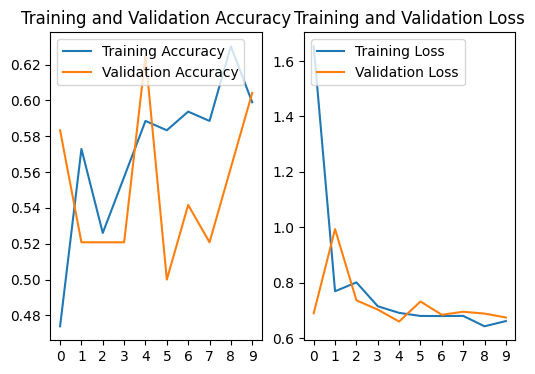

<Figure size 640x480 with 0 Axes>

In [25]:
# Plot the training results
my_training_results(history)

# Hyperparameters tuning

References: https://keras.io/guides/keras_tuner/getting_started/

In [26]:
# Tuning hyperparameters
import keras_tuner

def call_existing_code(dense_units, activation_1, activation_2, dropout_rate):
    model = my_model_sequence(dense_units, activation_1, activation_2, dropout_rate)
    my_compile_model(model)
    return model

def my_build_model(hp):
    dense_units = hp.Int("units", min_value=32, max_value=128, step=32)
    activation_1 = hp.Choice("activation", ["relu", "tanh"])
    activation_2 = hp.Choice("activation", ["relu", "tanh"])
    dropout_rate = hp.Float("rate", min_value=0.1, max_value=0.3, sampling="log")
    
    # call existing model-building code with the hyperparameter values.
    model = call_existing_code(
        dense_units=dense_units, activation_1=activation_1, activation_2=activation_2, 
        dropout_rate=dropout_rate,
    )
    return model


my_build_model(keras_tuner.HyperParameters())

Using TensorFlow backend
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_2 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 random_translation_2 (Rand  (None, 256, 256, 3)       0         
 omTranslation)                                                  
                                                                 
 random_rotation_2 (RandomR  (None, 256, 256, 3)       0         
 otation)                                                        
                                                                 
 random_zoom_2 (RandomZoom)  (None, 256, 256, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           

In [27]:
def my_random_search():
    t = keras_tuner.RandomSearch(
        hypermodel=my_build_model,
        objective="val_acc",
        max_trials=3,
        executions_per_trial=1,
        overwrite=True,
        directory="/workspaces/codespaces-jupyter/my_logdir",
        project_name="cat_dog_tuner",
    )
    t.search_space_summary()
    return t
    
tuner = my_random_search()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_3 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 random_translation_3 (Rand  (None, 256, 256, 3)       0         
 omTranslation)                                                  
                                                                 
 random_rotation_3 (RandomR  (None, 256, 256, 3)       0         
 otation)                                                        
                                                                 
 random_zoom_3 (RandomZoom)  (None, 256, 256, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 254, 254, 32)     

for i, (image_batch, labels_batch) in enumerate(train_ds):
  print(f"First batch of {image_batch.shape[0]} is a 3D tensor of shape {image_batch.shape[1:]}.")
  print(f"Labels is of shape {labels_batch.shape}")
  # Only print one iteration
  if i == 0: break

In [28]:
print(tuner)
tuner.search(train_ds, validation_data=val_ds, epochs=2)

Trial 3 Complete [00h 00m 16s]
val_acc: 0.5625

Best val_acc So Far: 0.5625
Total elapsed time: 00h 00m 43s


In [29]:
# According to the documentation at 
# https://keras.io/api/keras_tuner/tuners/base_tuner/#getbestmodels-method
# This method is for querying the models trained during the search. 
# For best performance, it is recommended to retrain your Model on 
# the full dataset using the best hyperparameters found during search, 
# which can be obtained using tuner.get_best_hyperparameters().

# Get the top 1 models.
models = tuner.get_best_models(num_models=1)
best_model = models[0]
# Build the model.
# Needed for `Sequential` without specified `input_shape`.
best_model.build(input_shape=(img_width, img_height, num_channel))
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 256, 256, 3)       0         
                                                                 
 random_translation (Random  (None, 256, 256, 3)       0         
 Translation)                                                    
                                                                 
 random_rotation (RandomRot  (None, 256, 256, 3)       0         
 ation)                                                          
                                                                 
 random_zoom (RandomZoom)    (None, 256, 256, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      8

In [30]:
tuner.results_summary()

Results summary
Results in /workspaces/codespaces-jupyter/my_logdir/cat_dog_tuner
Showing 10 best trials
Objective(name="val_acc", direction="max")

Trial 2 summary
Hyperparameters:
units: 128
activation: relu
rate: 0.273272104153763
Score: 0.5625

Trial 0 summary
Hyperparameters:
units: 32
activation: relu
rate: 0.238016185206535
Score: 0.5416666865348816

Trial 1 summary
Hyperparameters:
units: 32
activation: relu
rate: 0.15830762220922434
Score: 0.5208333134651184


In [31]:
# Retrain the model with the best hyperparameters
# Get the top 1 hyperparameters.
best_hps = tuner.get_best_hyperparameters(num_trials=1)
    
# Build the model with the best hp.
best_model = my_build_model(best_hps[0])

best_model.fit(train_ds, epochs=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 random_translation_1 (Rand  (None, 256, 256, 3)       0         
 omTranslation)                                                  
                                                                 
 random_rotation_1 (RandomR  (None, 256, 256, 3)       0         
 otation)                                                        
                                                                 
 random_zoom_1 (RandomZoom)  (None, 256, 256, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 254, 254, 32)     

In [32]:

# The test files for cat
p = os.path.join(data_dir, test_dir, cat_class)
image_list = list(Path(p).glob("*.jpg"))
print(f"Number of files in {p}: {len(image_list)}")

# Get the filenames
for i in range(5):
    print(image_list[i])


Number of files in /workspaces/codespaces-jupyter/data/cat_dog/test/cat: 50
/workspaces/codespaces-jupyter/data/cat_dog/test/cat/Sphynx_104_jpg.rf.e7cb65a6212f786130b1bf1bf6d114a1.jpg
/workspaces/codespaces-jupyter/data/cat_dog/test/cat/Ragdoll_179_jpg.rf.ea82d93718e6994d7c36c2dba763e460.jpg
/workspaces/codespaces-jupyter/data/cat_dog/test/cat/Abyssinian_174_jpg.rf.e2cf9b76cf12896d0a5672ad19fbd519.jpg
/workspaces/codespaces-jupyter/data/cat_dog/test/cat/cat_54.jpg
/workspaces/codespaces-jupyter/data/cat_dog/test/cat/cat_13.jpg


In [33]:
# Load images for predictions
# utils.load_img()
# https://keras.io/api/data_loading/image/#loadimg-function
# Return: Loads an image into PIL format.

image = keras.utils.load_img(
        path=image_list[0],
        grayscale=False,
        color_mode="rgb",
        target_size=(img_height, img_width),
        interpolation="bilinear",
        keep_aspect_ratio=False,
)



In [34]:
input_arr = tf.keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
pred = model.predict(input_arr)

1/1 [==============================] - 0s 144ms/step


In [35]:
pred

array([[0.8335743]], dtype=float32)

In [36]:
# The test dir with test images
test_path = os.path.join(data_dir, test_dir)
# Load the test dataset
test_ds = load_image_dataset(test_path, None)

Found 100 files belonging to 2 classes.
Loading images from /workspaces/codespaces-jupyter/data/cat_dog/test
Subset: None
['cat', 'dog']



In [37]:
pred = best_model.predict(test_ds)

7/7 [==============================] - 1s 105ms/step


In [38]:
print(f"Number of predictions: {len(pred)}")
print(f"Shape of predictions: {pred.shape}")

Number of predictions: 100
Shape of predictions: (100, 1)


In [39]:
results = best_model.evaluate(test_ds)
print(best_model.metrics_names)
for i, k in enumerate(results):
    print(f"{best_model.metrics_names[i]}: {results[i]}")

7/7 [==============================] - 1s 107ms/step - loss: 0.6981 - acc: 0.5000
['loss', 'acc']
loss: 0.6981350183486938
acc: 0.5


In [40]:
results = model.evaluate(test_ds)
print(model.metrics_names)
for i, k in enumerate(results):
    print(f"{model.metrics_names[i]}: {results[i]}")

7/7 [==============================] - 1s 110ms/step - loss: 0.6185 - acc: 0.6600
['loss', 'acc']
loss: 0.6185157895088196
acc: 0.6600000262260437


In [46]:
print(labels_batch)
print(pred)

tf.Tensor(
[[1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]], shape=(16, 1), dtype=float32)
[[0.5522909 ]
 [0.5363593 ]
 [0.5398507 ]
 [0.53803545]
 [0.54787225]
 [0.52731985]
 [0.52069694]
 [0.5582106 ]
 [0.5446331 ]
 [0.554622  ]
 [0.5378185 ]
 [0.5364822 ]
 [0.55215234]
 [0.5406702 ]
 [0.53789204]
 [0.5506628 ]]


In [47]:
# To interpret the binary classification
# Reference: https://stackoverflow.com/questions/52018645/how-do-i-determine-the-binary-class-predicted-by-a-convolutional-neural-network

print("{0:15}{1:15}".format("Prediction", "Actual"))
# When predictin > 0.5, class 1 is predicted
pred_class = 0

for i, (image_batch, labels_batch) in enumerate(train_ds):
    print(f"Batch size: {len(labels_batch)}")
    pred = best_model.predict(image_batch)
    for i in range(len(labels_batch)):
        if pred[i] < 0.5: 
            pred_class = 0
        else:
            pred_class = 1
        actual_label = int(labels_batch[i])
        print(f"{class_names[pred_class]:15}{class_names[actual_label]:15}")
        if i == 1: break

Prediction     Actual         
Batch size: 16
1/1 [==============================] - 0s 129ms/step
dog            cat            
dog            dog            
Batch size: 16
1/1 [==============================] - 0s 130ms/step
dog            dog            
dog            cat            
Batch size: 16
1/1 [==============================] - 0s 135ms/step
dog            dog            
dog            dog            
Batch size: 16
1/1 [==============================] - 0s 132ms/step
dog            dog            
dog            cat            
Batch size: 16
1/1 [==============================] - 0s 135ms/step
dog            dog            
dog            cat            
Batch size: 16
1/1 [==============================] - 0s 146ms/step
dog            dog            
dog            dog            
Batch size: 16
1/1 [==============================] - 0s 147ms/step
dog            cat            
dog            dog            
Batch size: 16
1/1 [==============================] - 0s 13

In [48]:
pred = model.predict(test_ds)

7/7 [==============================] - 1s 115ms/step


AttributeError: '_PrefetchDataset' object has no attribute 'shape'